# Automated text summarization

##### Anaconda env: streamlit. All spacy(==2...) language models are also installed there.
https://rpubs.com/mohammadshadan/install_spacy

### 1. Importing libs and data cleaning

In [54]:
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
import os
import pandas as pd
import io
import re

nlp = spacy.load('en_core_web_md')

SampleDir = "D:/Work/Programming/Udemy/Prj4_AutomatedSummary/"

read_file = io.open(os.path.join(SampleDir,"sample.txt"), "r", encoding = "utf8")
text0 = read_file.read()
read_file.close()
text = text.replace("\n", " ")
re.sub('\s{2,}', ' ', text)

print(len(text))

4036


In [55]:
doc = nlp(text)
tokens = [token.text for token in doc]

print(tokens)

['In', 'a', 'wide', 'variety', 'of', 'biological', 'processes', 'including', 'embryogenesis', ',', 'immune', 'cells', 'motility', ',', 'wound', 'healing', 'or', 'cancer', 'metastasis', ',', 'cells', 'sense', 'and', 'interpret', 'time', '-', 'varying', 'chemical', 'signals', 'that', 'reflect', 'the', 'non', '-', 'stationary', 'environment', 'to', 'which', 'they', 'readily', 'adapt', '.', 'It', 'has', 'been', ',', 'for', 'example', ',', 'demonstrated', 'that', 'time', '-', 'varying', 'growth', 'factor', 'signals', 'not', 'only', 'trigger', 'corresponding', 'phenotypic', 'output', 'in', 'cells', ',', 'but', 'a', 'range', 'of', 'input', 'frequencies', 'can', 'bias', 'towards', 'a', 'specific', 'function', 'i.e.', 'differentiation', ',', 'irrespective', 'of', 'growth', 'factor', 'identity', '.', 'Cells', ' ', 'can', 'also', 'direct', 'their', 'motility', 'through', 'continuously', 'changing', 'patterns', 'of', 'chemical', 'signals', 'such', 'as', 'travelling', 'waves', 'of', 'chemoattractan

In [65]:
punctuation1 = punctuation + '\n'
punctuation1

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n\n'

## 2. Text cleaning

In [66]:
### creating word frequency counter -> how mny times a (non stop and non punctuation) word is appearing

word_freq={}
stop_words = list(STOP_WORDS)

for word in doc:
    if word.text.lower() not in stop_words:
        if word.text.lower() not in punctuation1:
            if word.text not in word_freq.keys():
                word_freq[word.text] = 1
            else:
                word_freq[word.text] += 1
            
print(word_freq)

{'wide': 1, 'variety': 1, 'biological': 2, 'processes': 1, 'including': 1, 'embryogenesis': 1, 'immune': 1, 'cells': 4, 'motility': 2, 'wound': 1, 'healing': 1, 'cancer': 1, 'metastasis': 1, 'sense': 2, 'interpret': 1, 'time': 8, 'varying': 7, 'chemical': 2, 'signals': 10, 'reflect': 1, 'non': 3, 'stationary': 2, 'environment': 2, 'readily': 1, 'adapt': 1, 'example': 1, 'demonstrated': 1, 'growth': 7, 'factor': 6, 'trigger': 1, 'corresponding': 1, 'phenotypic': 1, 'output': 1, 'range': 2, 'input': 1, 'frequencies': 1, 'bias': 1, 'specific': 1, 'function': 1, 'i.e.': 1, 'differentiation': 1, 'irrespective': 1, 'identity': 1, 'Cells': 1, ' ': 1, 'direct': 2, 'continuously': 1, 'changing': 1, 'patterns': 1, 'travelling': 1, 'waves': 1, 'chemoattractants': 1, 'memory': 10, 'stimulus': 2, 'history': 2, 'integrate': 2, 'conflicting': 1, 'Generally': 1, 'transient': 5, 'main': 1, 'requirement': 1, 'systems': 3, 'process': 1, 'means': 1, 'temporal': 2, 'dependencies': 1, 'inherent': 1, 'signal

In [67]:
### norrmalizing using max frequency

max_freq = max(word_freq.values())

for word in word_freq.keys():
    word_freq[word] = word_freq[word]/max_freq

print(word_freq)

{'wide': 0.1, 'variety': 0.1, 'biological': 0.2, 'processes': 0.1, 'including': 0.1, 'embryogenesis': 0.1, 'immune': 0.1, 'cells': 0.4, 'motility': 0.2, 'wound': 0.1, 'healing': 0.1, 'cancer': 0.1, 'metastasis': 0.1, 'sense': 0.2, 'interpret': 0.1, 'time': 0.8, 'varying': 0.7, 'chemical': 0.2, 'signals': 1.0, 'reflect': 0.1, 'non': 0.3, 'stationary': 0.2, 'environment': 0.2, 'readily': 0.1, 'adapt': 0.1, 'example': 0.1, 'demonstrated': 0.1, 'growth': 0.7, 'factor': 0.6, 'trigger': 0.1, 'corresponding': 0.1, 'phenotypic': 0.1, 'output': 0.1, 'range': 0.2, 'input': 0.1, 'frequencies': 0.1, 'bias': 0.1, 'specific': 0.1, 'function': 0.1, 'i.e.': 0.1, 'differentiation': 0.1, 'irrespective': 0.1, 'identity': 0.1, 'Cells': 0.1, ' ': 0.1, 'direct': 0.2, 'continuously': 0.1, 'changing': 0.1, 'patterns': 0.1, 'travelling': 0.1, 'waves': 0.1, 'chemoattractants': 0.1, 'memory': 1.0, 'stimulus': 0.2, 'history': 0.2, 'integrate': 0.2, 'conflicting': 0.1, 'Generally': 0.1, 'transient': 0.5, 'main': 0

## Sentence tokenization

In [59]:
sent_tokens = [sent for sent in doc.sents]

print(sent_tokens)

[In a wide variety of biological processes including embryogenesis, immune cells motility, wound healing or cancer metastasis, cells sense and interpret time-varying chemical signals that reflect the non-stationary environment to which they readily adapt., It has been, for example, demonstrated that time-varying growth factor signals not only trigger corresponding phenotypic output in cells, but a range of input frequencies can bias towards a specific function i.e. differentiation, irrespective of growth factor identity., Cells  can also direct their motility through continuously changing patterns of chemical signals such as travelling waves of chemoattractants, using memory of stimulus history to integrate conflicting signals., Generally, a transient memory of stimulus history is a main requirement for systems that process time-varying signals, as a means to integrate temporal dependencies inherent in the signal., How cells sense the growth factors from their environment has been exte

In [60]:
### giving score to individual words in each sentence.

sent_score = {}

for sent in sent_tokens:
    for word in sent:
        if word.text.lower() in word_freq.keys():
            if sent not in sent_score.keys():
                sent_score[sent] = word_freq[word.text.lower()]
            else:
                sent_score[sent] += word_freq[word.text.lower()]
                
print(sent_score)

{In a wide variety of biological processes including embryogenesis, immune cells motility, wound healing or cancer metastasis, cells sense and interpret time-varying chemical signals that reflect the non-stationary environment to which they readily adapt.: 6.2, It has been, for example, demonstrated that time-varying growth factor signals not only trigger corresponding phenotypic output in cells, but a range of input frequencies can bias towards a specific function i.e. differentiation, irrespective of growth factor identity.: 7.199999999999996, Cells  can also direct their motility through continuously changing patterns of chemical signals such as travelling waves of chemoattractants, using memory of stimulus history to integrate conflicting signals.: 5.4, Generally, a transient memory of stimulus history is a main requirement for systems that process time-varying signals, as a means to integrate temporal dependencies inherent in the signal.: 5.999999999999999, How cells sense the gro

## 4. Select top 30% scoring sentences 

In [61]:
### grab sentences with max. score : first 30%
### those sentences will become the summary of article

from heapq import nlargest

TopSentsNum = round(len(sent_score)*0.3)
TopSentsNum

6

In [62]:
summary = nlargest(TopSentsNum, iterable=sent_score, key=sent_score.get)

print(summary)

[It has been, for example, demonstrated that time-varying growth factor signals not only trigger corresponding phenotypic output in cells, but a range of input frequencies can bias towards a specific function i.e. differentiation, irrespective of growth factor identity., In contrast to the short- or long-term memory that stem from stable attractors, we demonstrate that this transient memory is dynamic and thereby uniquely promotes integrating and interpreting complex temporal growth factor signals., We further discuss why organization at criticality represents a generic dynamical mechanism which enables processing of time-varying growth factor signals by cell surface receptors., We propose here a saddle-node (SN) “ghost” as a minimal dynamical mechanism that enables processing of time-varying growth factor signals., In a wide variety of biological processes including embryogenesis, immune cells motility, wound healing or cancer metastasis, cells sense and interpret time-varying chemica

In [63]:
### combining these sentences together


final_summary = [word.text for word in summary]
final_summary = " ".join(final_summary)
print(final_summary)

It has been, for example, demonstrated that time-varying growth factor signals not only trigger corresponding phenotypic output in cells, but a range of input frequencies can bias towards a specific function i.e. differentiation, irrespective of growth factor identity. In contrast to the short- or long-term memory that stem from stable attractors, we demonstrate that this transient memory is dynamic and thereby uniquely promotes integrating and interpreting complex temporal growth factor signals. We further discuss why organization at criticality represents a generic dynamical mechanism which enables processing of time-varying growth factor signals by cell surface receptors. We propose here a saddle-node (SN) “ghost” as a minimal dynamical mechanism that enables processing of time-varying growth factor signals. In a wide variety of biological processes including embryogenesis, immune cells motility, wound healing or cancer metastasis, cells sense and interpret time-varying chemical sig

In [64]:
len(final_summary)/len(text)

0.31367690782953417

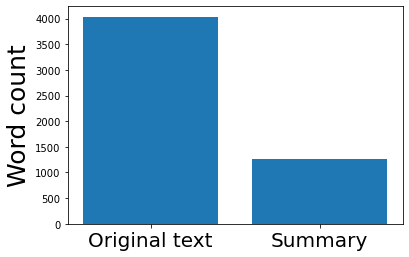

In [76]:
import matplotlib.pyplot as plt
fig = plt.figure()

texts = ['Original text', 'Summary']
data = [len(text), len(final_summary)]
plt.bar(texts,data)

plt.ylabel('Word count', fontsize=25)
plt.xticks(fontsize=20)

plt.show()